In [5]:
!pip install opencv-python
!pip install numpy

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
    --------------------------------------- 0.5/38.8 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.2/38.8 MB 9.2 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.8 MB 11.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/38.8 MB 13.2 MB/s eta 0:00:03
   ---- ----------------------------------- 4.0/38.8 MB 15.1 MB/s eta 0:00:03
   ----- ---------------------------------- 5.4/38.8 MB 17.2 MB/s eta 0:00:02
   ------- -------------------------------- 6.9/38.8 MB 19.2 MB/s eta 0:00:02
   -------- ------------------------------- 8.4/38.8 MB 20.8 MB/s eta 0:00:02
   ---------- ----------------------------- 9.8/38.8 MB 21.5 MB/s eta 0:00:02
   ----------- ---------------------------- 11.0/38.8 MB 25.1 MB/s eta 0:00:02
   ------------ --------------------------- 12.4/38.8 MB 28.4 MB/s eta 0

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [87]:
#read the image
og_img = cv.imread('pic.jpg')


In [111]:
og_img.shape

(1715, 1920, 3)

In [113]:
og_img

array([[[247, 234, 236],
        [245, 232, 234],
        [243, 230, 232],
        ...,
        [236, 217, 220],
        [234, 215, 218],
        [234, 215, 218]],

       [[243, 230, 232],
        [242, 229, 231],
        [241, 228, 230],
        ...,
        [238, 219, 222],
        [238, 219, 222],
        [238, 219, 222]],

       [[237, 224, 226],
        [238, 225, 227],
        [239, 225, 227],
        ...,
        [239, 220, 223],
        [240, 221, 224],
        [241, 222, 225]],

       ...,

       [[235, 212, 210],
        [236, 213, 211],
        [236, 213, 211],
        ...,
        [241, 216, 212],
        [240, 215, 211],
        [240, 215, 211]],

       [[239, 216, 214],
        [239, 216, 214],
        [239, 216, 214],
        ...,
        [241, 216, 212],
        [240, 215, 211],
        [241, 216, 212]],

       [[241, 218, 216],
        [241, 218, 216],
        [241, 218, 216],
        ...,
        [241, 216, 212],
        [241, 216, 212],
        [241, 216, 212]]

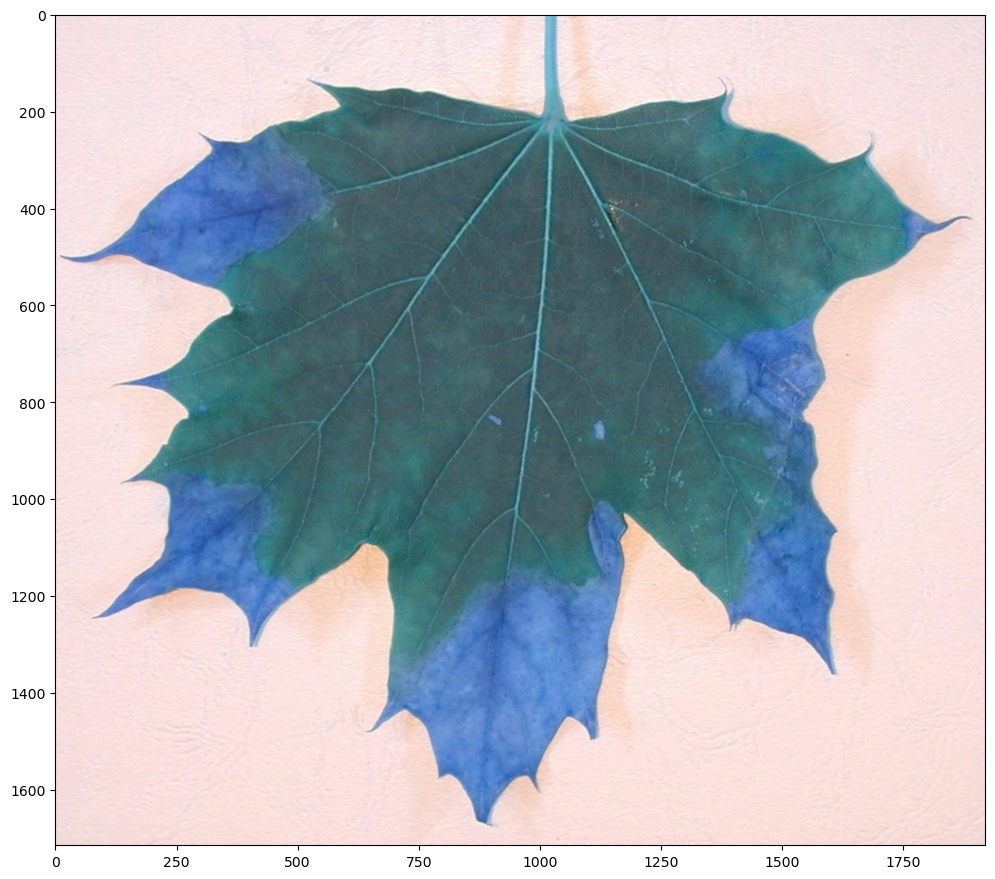

In [93]:
plt.imshow(og_img)

In [95]:
#comvert the image to HSV from RGB
# WHY??
# According to wikipedia the R, G, and B components of an object’s color
# in a digital image are all correlated with the amount of light hitting the object, 
# and therefore with each other, image descriptions in terms of those components make object discrimination difficult. 
# Descriptions in terms of hue/lightness/chroma or hue/lightness/saturation are often more relevant.
img=cv.cvtColor(og_img,cv.COLOR_BGR2RGB)

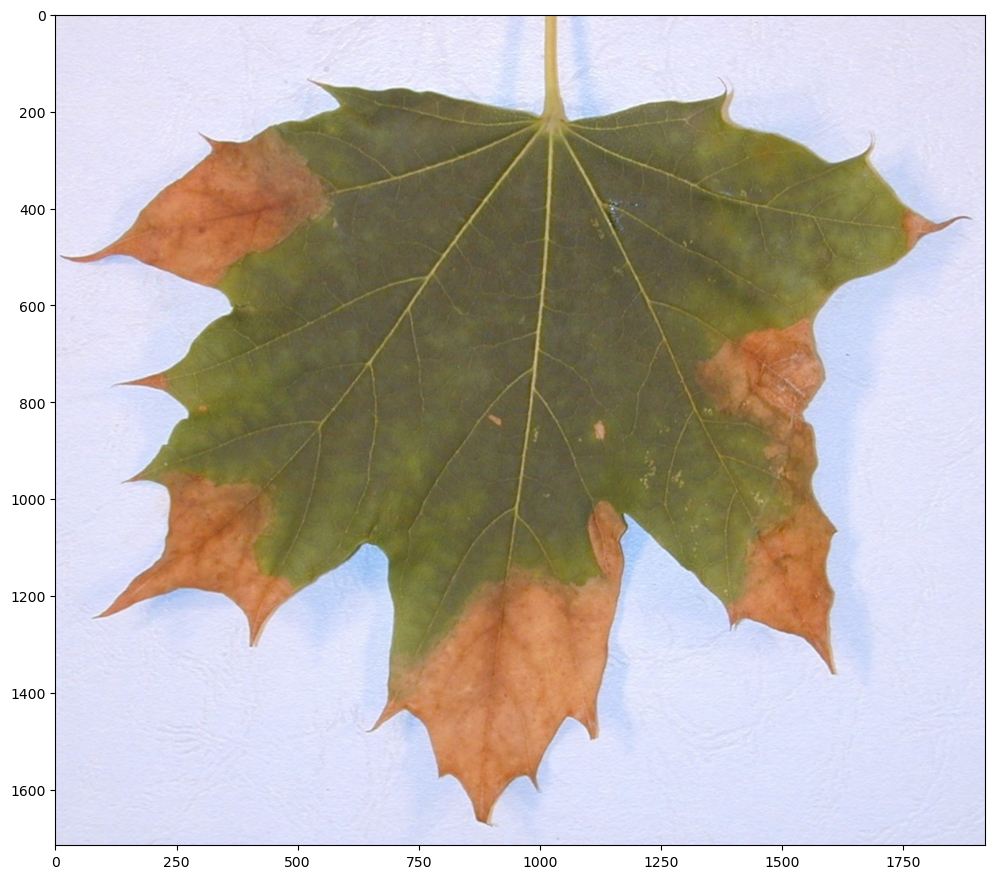

In [99]:
plt.imshow(img)

In [115]:
# Now reshape the img into Kx3 instead of MxNx3 where K = M * N. Each row is a pixel and each pixel has 3 values
vec = img.reshape((-1,3))#-1 for auto reshape with 3 columns

In [125]:
print(vec.shape)
print(vec[:5])

(3292800, 3)
[[236. 234. 247.]
 [234. 232. 245.]
 [232. 230. 243.]
 [230. 228. 241.]
 [230. 228. 242.]]


In [123]:
#convert it to float32 as required by k-means of open cv
vec = np.float32(vec)

In [131]:
# Define criteria, number of clusters(K) and apply k-means()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.
#samples is the np float32 array 

#criteria is iteration termination criteria, when the algorithm iteration stops
# Type of termination criteria. It has 3 flags as below:
# cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
# cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
# cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

# attempts is a Flag to specify the number of times the algorithm is executed using different initial labelings.
# The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

# flag is used to specify how initial centers are taken. Normally two flags are used for this:
# cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [183]:
K = 3
attempts=10
#clustering
ret,label,center=cv.kmeans(vec,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
#ret is the sum of squared distances from each points to their corresponding centers
#label is the label of the point
#center is the array of  centers of clusters

In [184]:
print(ret)
print('-'*20)
print(label[:5])
print('-'*20)
print(center)

1271983428.953781
--------------------
[[0]
 [0]
 [0]
 [0]
 [0]]
--------------------
[[222.57527  224.00754  251.1344  ]
 [108.519165 102.31379   61.611515]
 [184.13728  129.1825    84.17453 ]]


In [185]:
#converting them back to uint8 from float 32
center = np.uint8(center)
center

array([[222, 224, 251],
       [108, 102,  61],
       [184, 129,  84]], dtype=uint8)

In [186]:
#return an array for the image where each pixel is one of the clusters with color of centers
res = center[label.flatten()] #flatten to convert label to 1d array
res

array([[222, 224, 251],
       [222, 224, 251],
       [222, 224, 251],
       ...,
       [222, 224, 251],
       [222, 224, 251],
       [222, 224, 251]], dtype=uint8)

In [187]:
# reshape back to 3d shape of the image
res_image = res.reshape((img.shape))

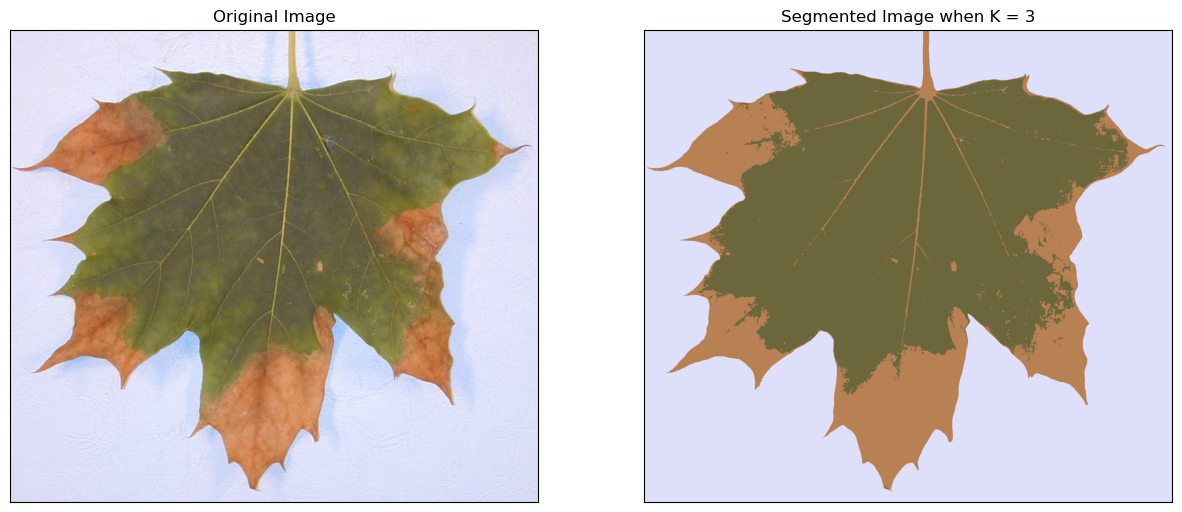

In [193]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

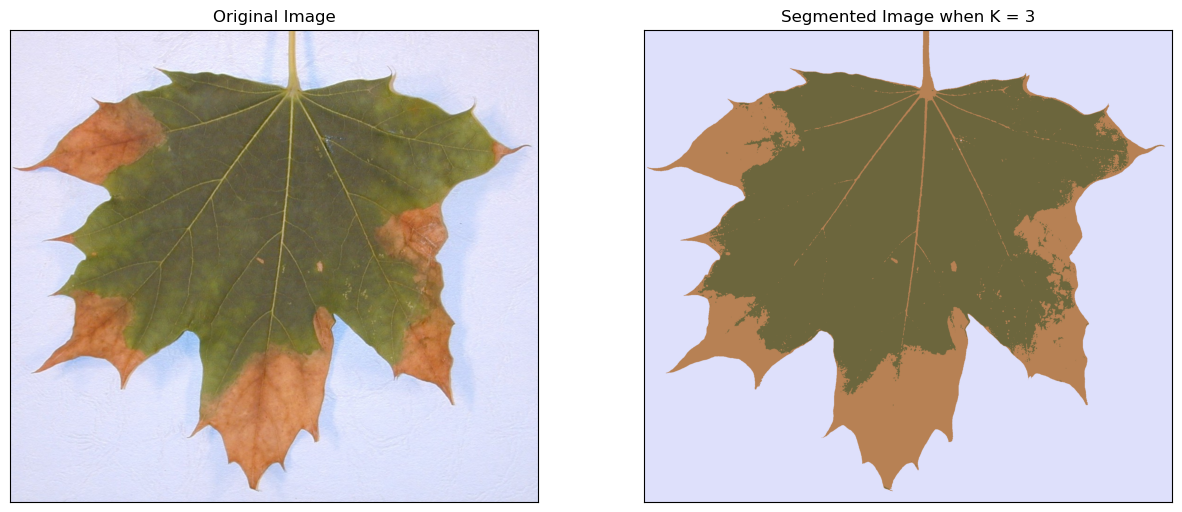

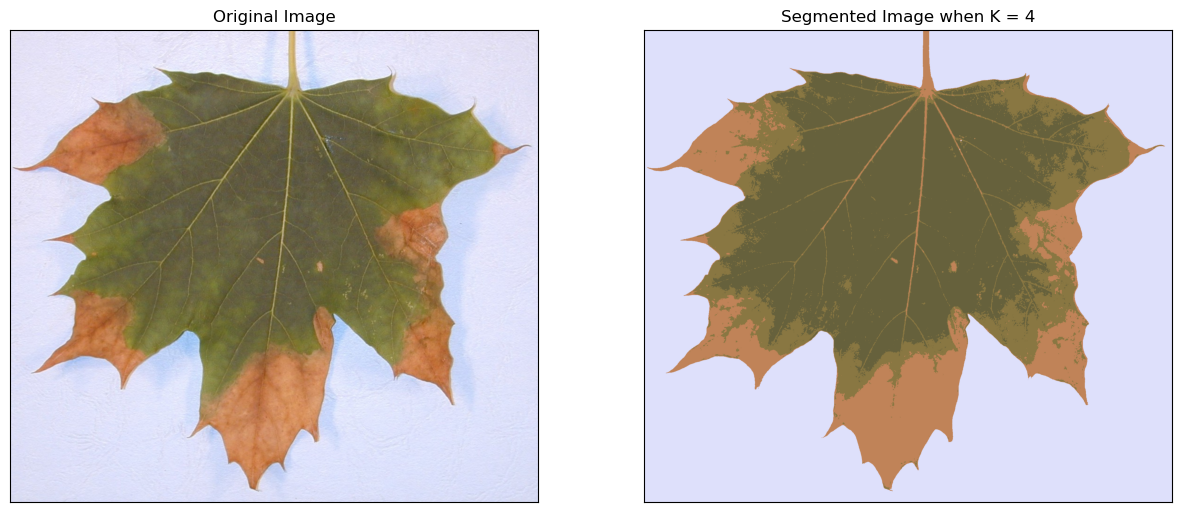

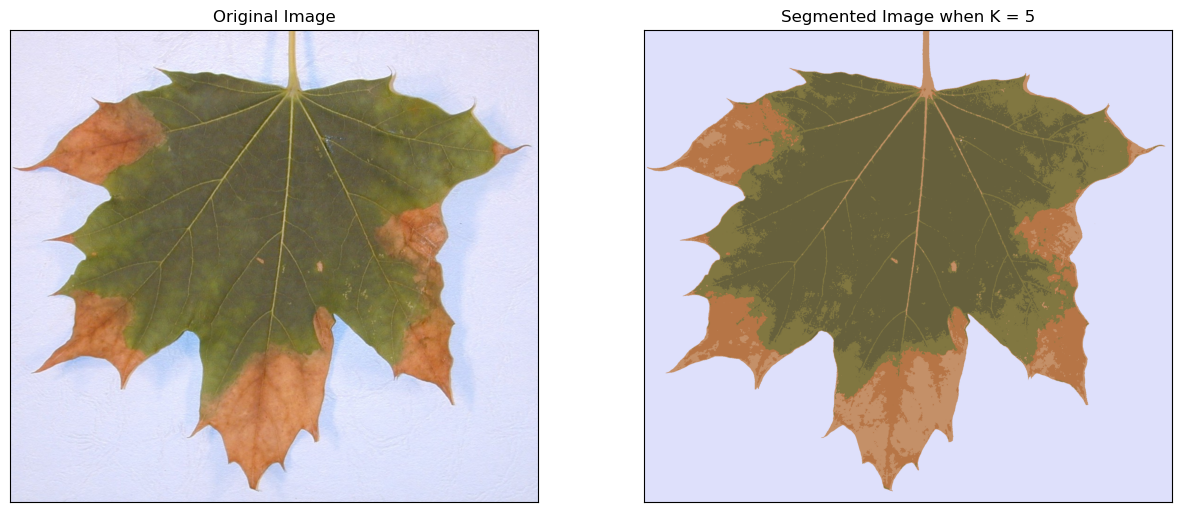

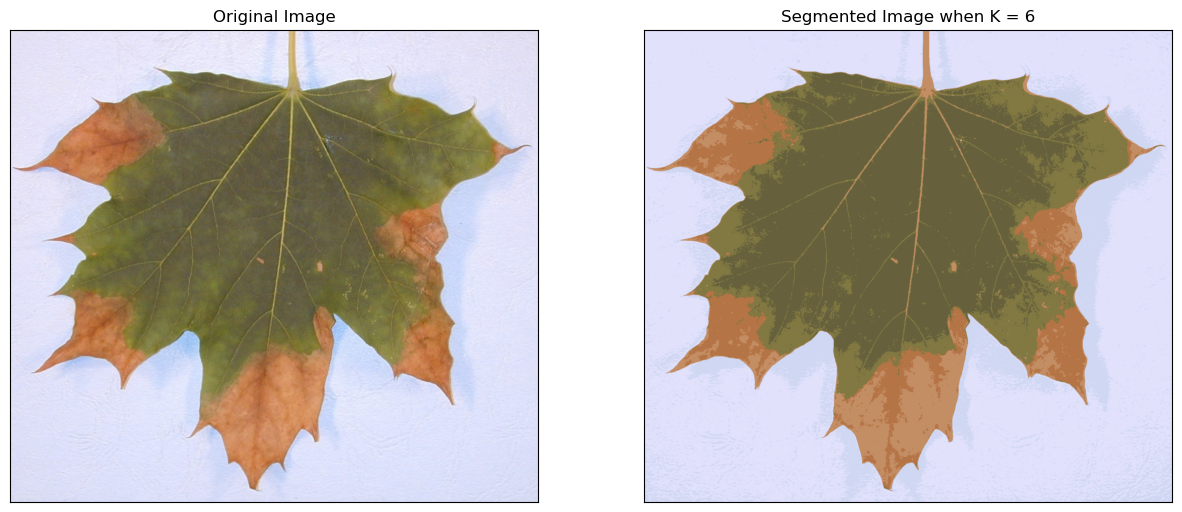

In [207]:
# Lets try for different values of k 
for i in range(3,7):
    attempts=10
    #clustering
    ret,label,center=cv.kmeans(vec,i,None,criteria,attempts,cv.KMEANS_PP_CENTERS)    
    
    center = np.uint8(center)
    res = center[label.flatten()] #flatten to convert label to 1d array
    res_image = res.reshape((img.shape))
    
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 2, 2)
    plt.imshow(res_image)
    plt.title(f'Segmented Image when K = {i}')
    plt.xticks([]), plt.yticks([])


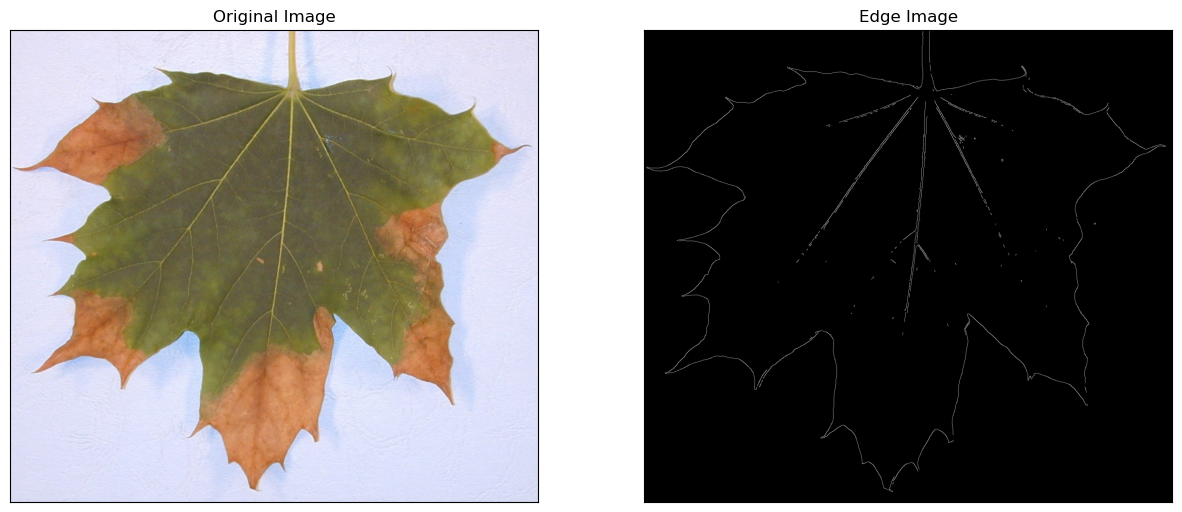

In [203]:

edges = cv.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
